In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/PPO/feats/ppo_env4_feats10v7/PPO_continuous-grid_d1217_00000_0_2022-04-11_13-26-15/"
log_df= pd.read_csv(EXPERIMENT_DIR + "/progress.csv")
#log_df = log_df.loc[list(range(0,len(log_df),10))]
log_df = log_df.loc[list(range(0,400,10))]
log_df["reward_sum"] = log_df.loc[:, ["episode_reward_min","episode_reward_mean", "episode_reward_max"]].sum(axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/PPO/feats/ppo_env4_feats10v7/PPO_continuous-grid_d1217_00000_0_2022-04-11_13-26-15//progress.csv'

330 46
40 17
300 49
360 33
340 41
220 35
140 50
150 43
290 45
180 49
370 29
190 35
80 36
250 43
170 55
390 24
120 48
350 31
130 43
270 46
320 50
400 28
380 26


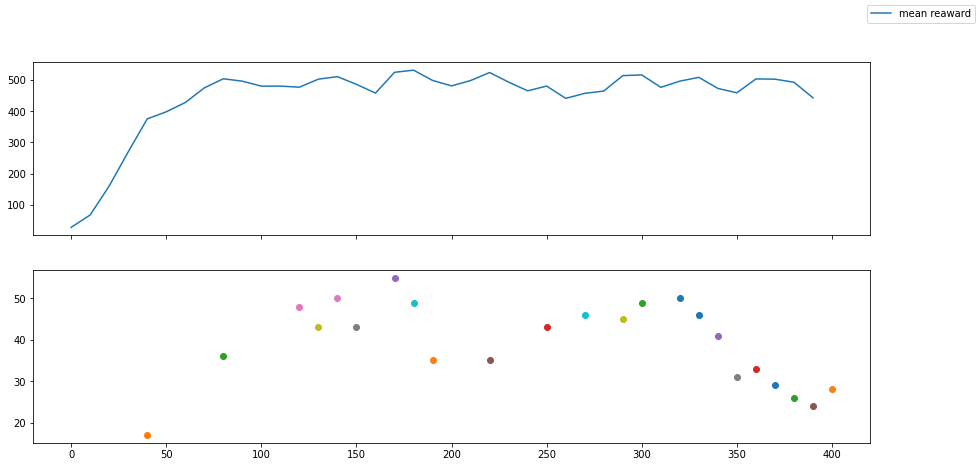

In [109]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    if "checkpoint-" in fName and "_test.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

774

In [6]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/feats10v7_train/ppo_env7feats10v7_train5v2/PPO_continuous-grid_43e23_00002_2_2022-05-19_12-45-17/"
log_df= pd.read_csv(EXPERIMENT_DIR + "/progress.csv")
log_df = log_df.loc[list(range(0,log_df.index[-1]+1,10))]
log_df["reward_sum"] = log_df.loc[:, ["episode_reward_min","episode_reward_mean", "episode_reward_max"]].sum(axis=1)

470 1
330 2
40 0
450 3
70 0
260 1
610 1
50 0
360 3
10 0
340 3
540 3
730 1
90 1
220 3
550 1
140 1
150 1
290 5
530 4
520 3
180 1
370 1
200 1
660 3
750 2
480 2
20 0
190 0
240 2
590 2
checkpoint-670_test.csv less then 100 seeds tested 57
650 3
420 5
80 0
560 1
640 1
250 2
280 1
510 1
110 0
430 3
500 2
570 2
630 1
620 1
230 2
170 1
390 2
120 0
350 1
130 0
270 3
320 2
440 4
400 4
100 0
460 4
720 1
210 2
160 0
30 0
710 1
760 0
380 2
740 3
490 3
60 0
580 1


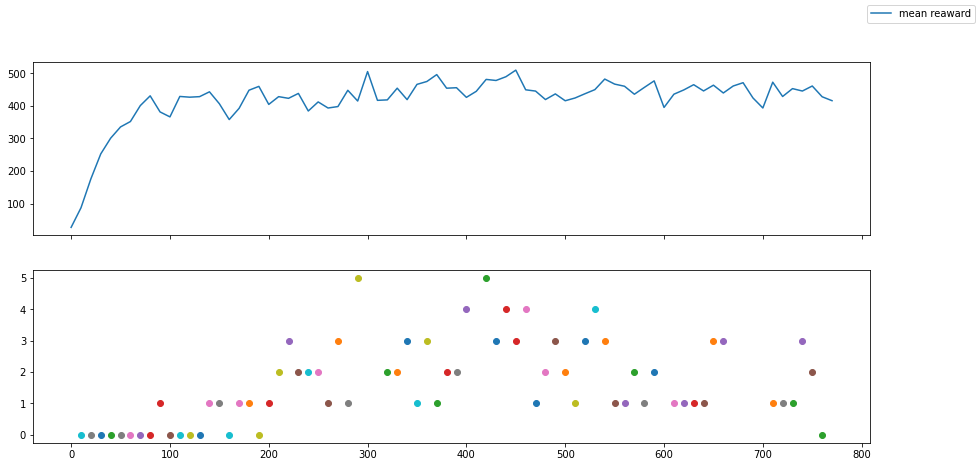

In [7]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    if "checkpoint-" in fName and "_test.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

470 4
330 0
40 3
450 3
70 2
700 4
260 0
610 0
300 0
50 4
360 1
10 0
340 1
540 2
730 2
90 2
220 2
550 0
140 1
150 2
290 0
530 3
520 0
180 0
370 3
690 2
660 0
750 4
480 1
680 0
20 0
190 1
240 0
590 0
670 0
650 4
420 3
80 3
560 4
640 3
250 0
280 0
510 3
110 1
430 0
570 0
630 4
620 4
230 1
170 0
390 1
120 0
350 0
130 0
270 0
320 2
440 2
400 4
100 2
460 3
720 4
410 3
160 2
30 0
710 3
760 3
600 0
380 2
740 1
490 4
60 0
580 0


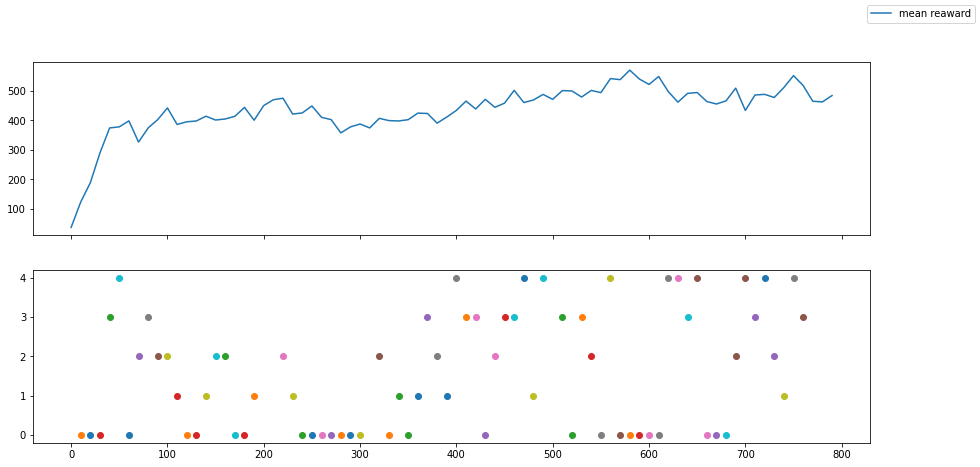

In [5]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    if "checkpoint-" in fName and "_test.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()